In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

# import utils
import sys
sys.path.append('../../../utils')
import price_models, rv_estimators

In [2]:
%load_ext autoreload
%autoreload 2

## 1. GBM

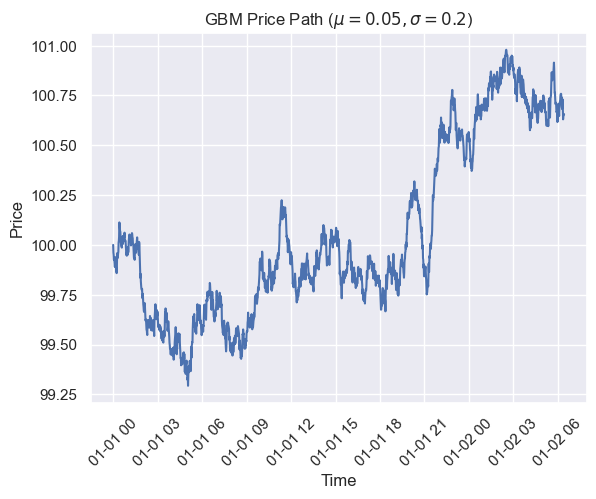

In [31]:
mu = 0.05
sigma = 0.2
bm = price_models.GBM(mu, sigma)
S0 = 100
T = 1/(12*24)
dt = 1/(365*24*60)
S = bm.simulate(T, dt)
bm.plot(S)

## 2. Heston

In [120]:
mu = 0.05
sigma = 0.3 # vol of vol
theta = 0.1 # long run variance
rho = -0.3 # correlation
kappa = 1 # mean reversion speed
nu0 = 0.1 # initial variance
S0 = 100
T = 1/12
dt = 1/(365*24*60)

heston = price_models.Heston(mu, sigma, theta, rho, kappa, nu0)
S, nu = heston.simulate(T, dt, S0)
# heston.plot(S, nu)

iv_real = np.sum(nu.values)*dt
print(f"Actual Realized IV: {iv_real}")
eps = 1e-3
noisy_ts = np.log(S) + np.random.normal(0, eps, S.shape)
iv_naive_est  = rv_estimators.rv_naive(noisy_ts, pd.Timedelta(100*dt*365, 'D'), verbose=False)
print(f"Naive RV Estimator: {iv_naive_est}")
iv_multigrid_est = rv_estimators.rv_multigrid(noisy_ts, pd.Timedelta(100*dt*365, 'D'), K=5, verbose=False)
print(f"Multigrid RV Estimator: {iv_multigrid_est}")
iv_best_est = rv_estimators.rv_best(noisy_ts, pd.Timedelta(100*dt*365, 'D'), K=5, verbose=False)
print(f"Best RV Estimator: {iv_best_est}")

Actual Realized IV: 0.008452247461095089
Naive RV Estimator: 0.009598589729229015
Multigrid RV Estimator: 0.008815893672359753
Best RV Estimator: 0.006913707397252267
